#NEURAL NETWORK CLASSIFICATION

Binary Classification (one thing or another); Multiclass Classification (more than one thing or another, one label per sample); Multilabel Classification (multiple label options per sample)

Input should be a tensor

Output should be a tensor

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


##Creating data to view and fit.

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42 )

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


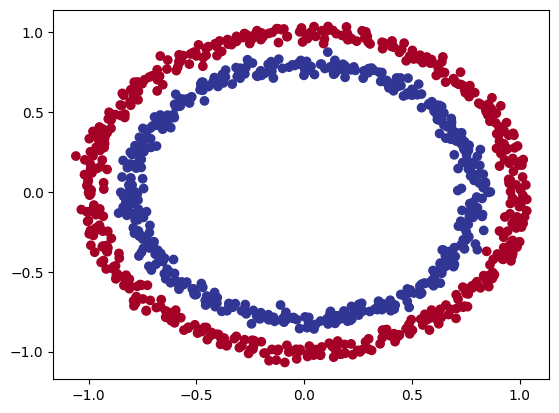

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

##Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=200, verbose = 0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935119032859802, 0.5]

Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [ ]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5070


[0.7012454271316528, 0.5070000290870667]

Still the results are not good

####Plotting Function to see what is going on

In [ ]:
import numpy as np

def plot_ddecision_boundary(model, X, y):
  '''
  Plots the decision boundary created by the model predicting on X.
  '''
  # Define axis voundaries of plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                      np.linspace(y_min,y_max,100))

  # Create X value
  x_in = np.c_[xx.ravel(),yy.ravel()]  #stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print('multi-class')
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
      print('binary')
      y_pred = np.round(y_pred).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
binary


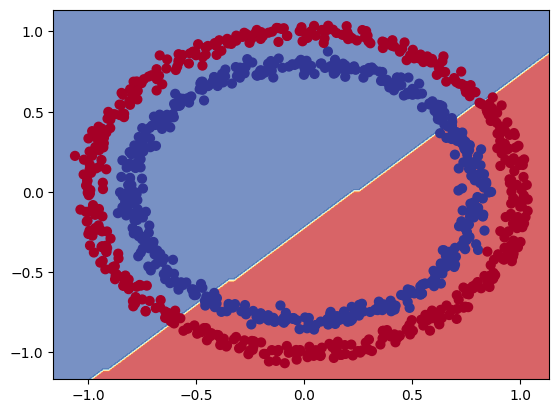

In [ ]:
# Check out model_3 predictions
plot_ddecision_boundary(model_3,X,y)

WOW

WE ARE GETTING BAD RESULT BECAUSE WE HAVE A LINEAR MODEL BECAUSE OUR MODEL IS STRUCTURED LIKE A REGRESSION MODEL

###Building NEW(correct) MODEL

In [ ]:
from keras.api._v2.keras.losses import binary_crossentropy
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# Compile
model_4.compile(
    loss = binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

# Fit the model
history = model_4.fit(X,y,epochs =100, verbose=0)

In [ ]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 6.0769 - accuracy: 0.4910


[6.076920986175537, 0.4909999966621399]

Still not good

313/313 [==============================] - 0s 899us/step
binary


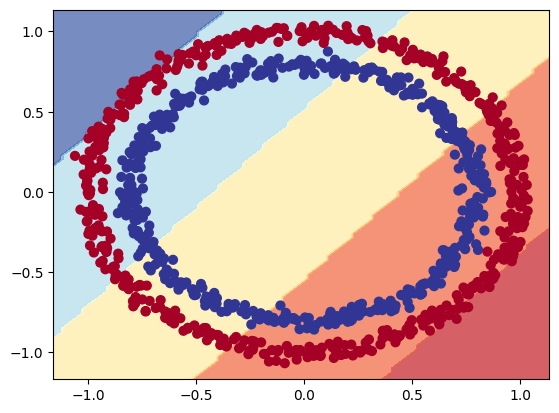

In [ ]:
plot_ddecision_boundary(model_4,X,y)

We need to implement non-linearity

###Build NON-LINEAR MODEL

In [ ]:
from keras.api._v2.keras.losses import binary_crossentropy
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# Compile
model_5.compile(
    loss = binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

# Fit the model
history = model_5.fit(X,y,epochs =100, verbose=0)

model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.4910


[0.7560022473335266, 0.4909999966621399]

313/313 [==============================] - 0s 1ms/step
binary


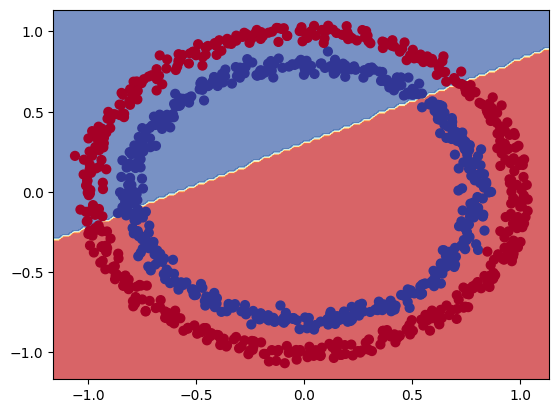

In [ ]:
plot_ddecision_boundary(model_5,X,y)

Not Good

###Better model

In [ ]:
from keras.api._v2.keras.losses import binary_crossentropy
# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")])

# Compile
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

# Fit the model
history = model_6.fit(X,y,epochs =500, verbose=0)

model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000


[0.001250115456059575, 1.0]

313/313 [==============================] - 1s 2ms/step
binary


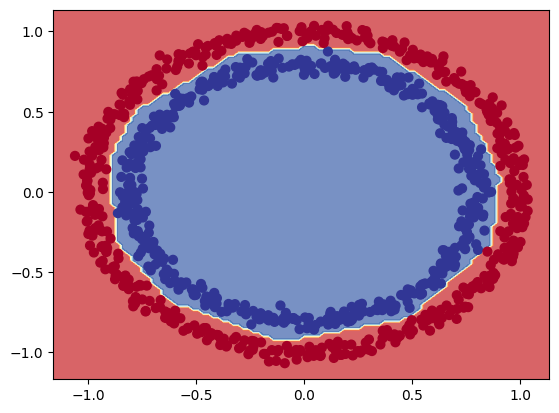

In [ ]:
plot_ddecision_boundary(model_6,X,y)

**GREAT**

__Remember that for binary, the output layer is sigmoid and for multiclass, it is softmax__

#### Confusion Matrix

32/32 [==============================] - 0s 1ms/step


(array([[500,   0],
        [  0, 500]]),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fe9d8726e50>)

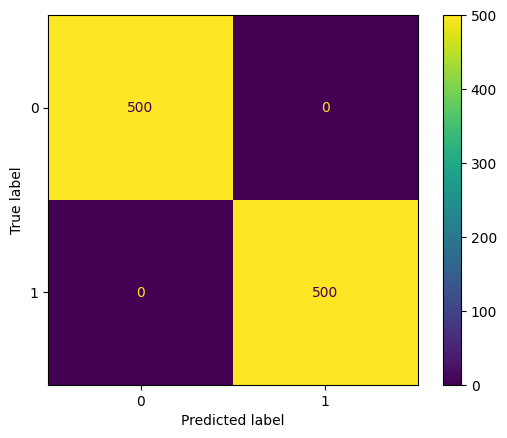

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y, tf.round(tf.squeeze(model_6.predict(X)))) , ConfusionMatrixDisplay(confusion_matrix(y, tf.round(tf.squeeze(model_6.predict(X))))).plot()

# We use tf.round to convert the prediction probabilites to labels

Text(0.5, 1.0, 'History of latest model')

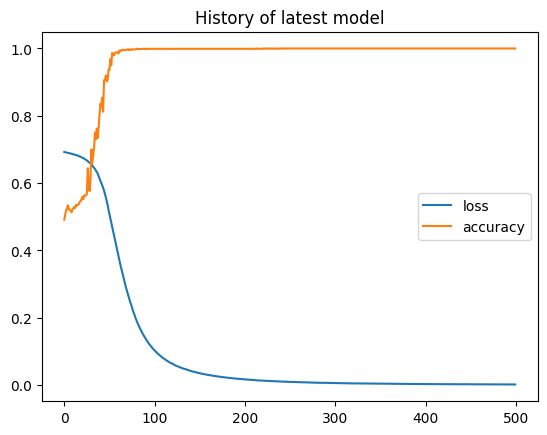

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("History of latest model")

To find the best learning rate, use **callbacks=[lr_scheduler]** in fitting the mode (i.e. history). Then while plotting the


**lrs = 1e-4 * (10 ** (np.arange(100)/20))**

**plt.figure(figsize=(10, 7))**

**plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale**


we get the best learning rate, which is the lowest point in the plot

##Working with a larger example (multiclass classification)

- When you have more than two classes.

We are going to build a neural network classifier to classify different fashion articles

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
# Check the spae of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

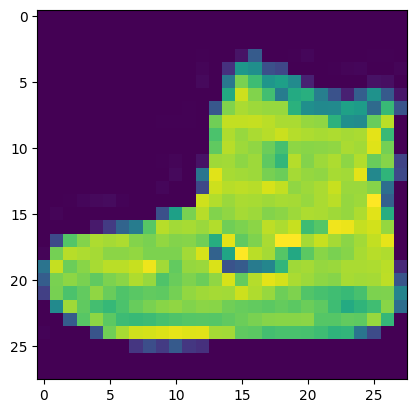

In [ ]:
# Plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[0])

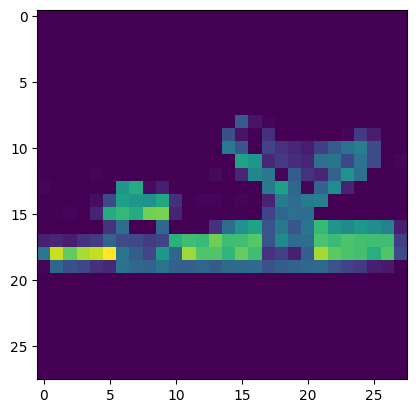

In [ ]:
plt.imshow(train_data[-1])

In [ ]:
# Create a small list so we can index onto our training labels so they are human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(class_names)

10

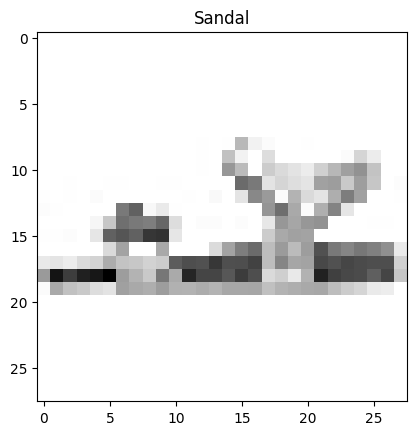

In [ ]:
# Plot an example image and ots label
plt.imshow(train_data[-1], cmap = plt.cm.binary)
plt.title(class_names[train_labels[-1]]);

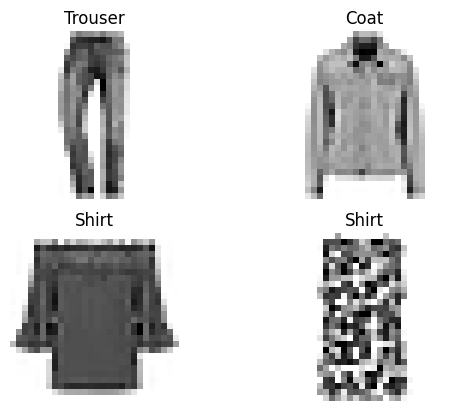

In [ ]:
# plot multiple random images of fashion MNIST

import random
plt.figure()
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]]);
  plt.axis(False)

###Building a multiclass classifier model

For our multiclass model:

- Input shape: It is of the form 28x28, we need 784 shape vector. We can flatten it, and make it the input layer
- Output shape: 10 (total classes)
- Loss function: tf.keras.losses.CategoricalCrossentropy()
- Activation function(output): Softmax

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

# Compile
model_7.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),   # we use SparseCategoricalCrossentropy instead of CategoricalCrossentropy because the labels ore not one-hot encoded
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),  # we can use tf.one_hot(test_labels, depth = 10) here too
    metrics = ['accuracy']
)

# Fit the model
non_norm_history = model_7.fit(train_data,train_labels,epochs =10, verbose=0, validation_data=(test_data,test_labels))

In [ ]:
model_7.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6621 - accuracy: 0.7324


[0.6620738506317139, 0.7324000000953674]

Text(0.5, 1.0, 'History of latest model')

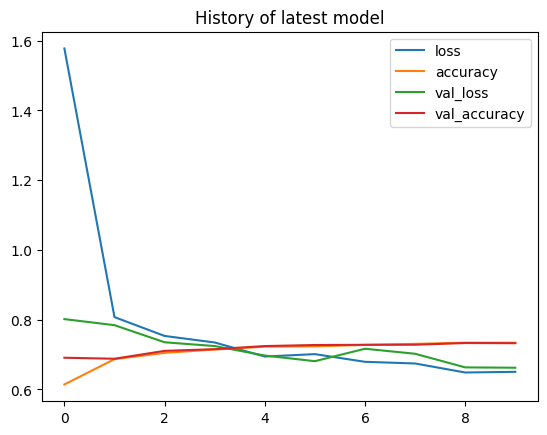

In [ ]:
pd.DataFrame(non_norm_history.history).plot()
plt.title("History of latest model")

Welp, the model is not great. This might be because the input is not normalized

###Building a better multiclass classifier

In [ ]:
# Normalizing the data between 0 and 1 (scaling the data)
# Divide train and test images by the maximum value (normalize it)
train_data_1 = train_data / train_data.max()
test_data_1 = test_data / train_data.max()

# Check the min and max values of the training data
train_data_1.min(), train_data_1.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

# Compile
model_8.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),   # we use SparseCategoricalCrossentropy instead of CategoricalCrossentropy because the labels ore not one-hot encoded
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),  # we can use tf.one_hot(test_labels, depth = 10) here too
    metrics = ['accuracy']
)

# Fit the model
norm_history = model_8.fit(train_data_1,train_labels,epochs =10, verbose=0, validation_data=(test_data_1,test_labels))

# Evaluate
model_8.evaluate(test_data_1,test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8698


[0.3698658347129822, 0.8697999715805054]

Text(0.5, 1.0, 'History of latest model')

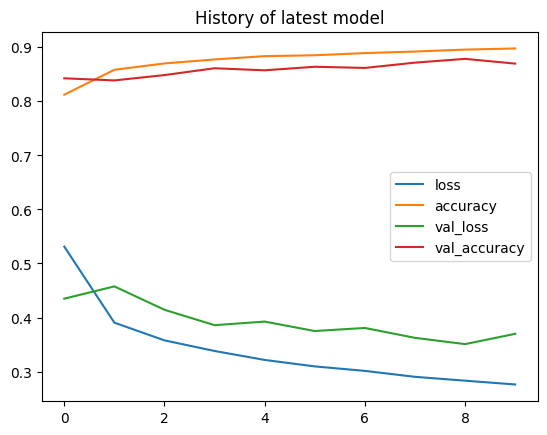

In [ ]:
pd.DataFrame(norm_history.history).plot()
plt.title("History of latest model")

####Finding the best/ideal learning rate using learning rate callback (learning rate where the loss decreases the most)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

# Compile
model_9.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),   # we use SparseCategoricalCrossentropy instead of CategoricalCrossentropy because the labels ore not one-hot encoded
    optimizer = tf.keras.optimizers.Adam(),  # we can use tf.one_hot(test_labels, depth = 10) here too
    metrics = ['accuracy']
)

# Creating learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_9.fit(train_data_1,train_labels,epochs =40, verbose=0, validation_data=(test_data_1,test_labels), callbacks = [lr_scheduler])


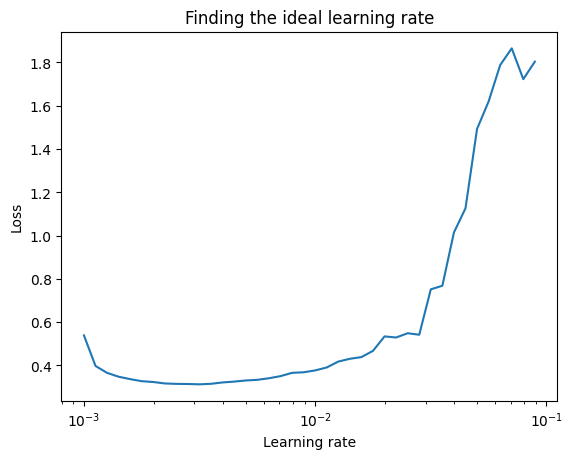

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Learning Rate at 0.001 seems ideal (the point just before loss at lowest)

###Best Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

# Compile
model_10.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),   # we use SparseCategoricalCrossentropy instead of CategoricalCrossentropy because the labels ore not one-hot encoded
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),  # we can use tf.one_hot(test_labels, depth = 10) here too
    metrics = ['accuracy']
)

# Fit the model
norm_history = model_10.fit(train_data_1,train_labels,epochs =20, verbose=0, validation_data=(test_data_1,test_labels))

# Evaluate
model_10.evaluate(test_data_1,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8789


[0.3635164201259613, 0.8788999915122986]

313/313 [==============================] - 0s 1ms/step


(array([[839,   6,  13,  20,   6,   0, 108,   0,   8,   0],
        [  3, 971,   2,  15,   4,   0,   4,   0,   1,   0],
        [ 17,   1, 765,  11, 136,   0,  69,   0,   1,   0],
        [ 25,  14,   7, 872,  47,   0,  32,   0,   3,   0],
        [  1,   0,  66,  19, 874,   0,  39,   0,   1,   0],
        [  0,   0,   0,   1,   0, 954,   0,  28,   5,  12],
        [120,   2,  82,  22, 113,   0, 655,   0,   6,   0],
        [  0,   0,   0,   0,   0,   9,   0, 975,   3,  13],
        [  6,   0,   3,   4,   8,   2,   6,   3, 968,   0],
        [  0,   0,   0,   0,   0,   7,   1,  76,   0, 916]]),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fe9cb035cd0>)

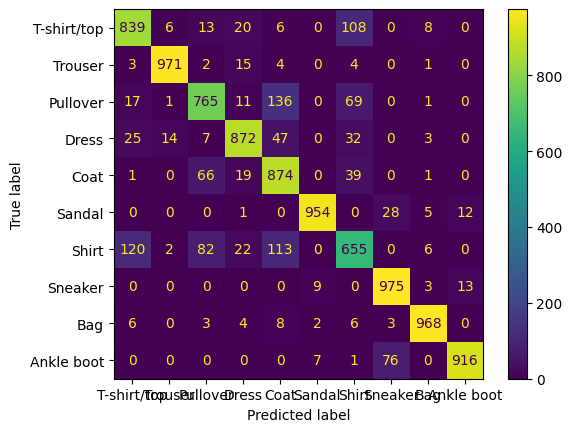

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(test_labels, model_10.predict(test_data_1).argmax(axis=-1)) , ConfusionMatrixDisplay(confusion_matrix(test_labels, model_10.predict(test_data_1).argmax(axis=-1)),display_labels=class_names).plot()

# We use .argmax(axis=-1) to convert the prediction probabilites to labels

Lets look at the final(best model) structure

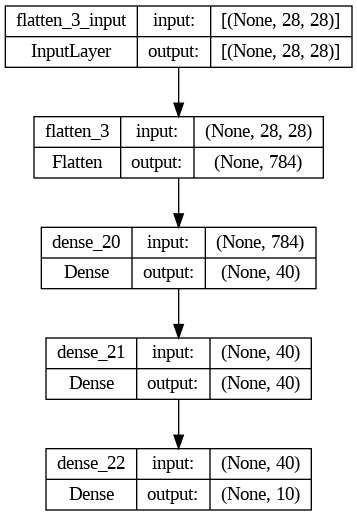

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_10, show_shapes=True)

**DONE**